<a href="https://colab.research.google.com/github/GVSU-CIS635/term-project-spotify-algorithm/blob/main/Spotify_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Preprocessing**

In [8]:
# First upload the data file
#Uploading the File and Loading the Data Set Section
# Would not allow us to import from Kaggle as a URL, so it had to be directly imported as a downloaded file, would only load when renamed as spotify.csv
# Link to Kaggle URL here: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset


from google.colab import files
uploaded= files.upload()

Saving dataset.csv (2).zip to dataset.csv (2) (1).zip


In [9]:
import zipfile
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# The path to the uploaded zip file
zip_file_path = 'dataset.csv (2).zip'

# Then access to the directory to extract files to
extract_dir = 'extracted_files'

# Unzipping the uploaded file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Now list the extracted files
extracted_files = os.listdir(extract_dir)
print(f'Extracted files: {extracted_files}')

# Load the CSV file into a DataFrame with assumption its the only csv file

csv_file = extracted_files[0]
csv_file_path = os.path.join(extract_dir, csv_file)
df = pd.read_csv(csv_file_path)

# Display the rows of the DataFrame
print(df)


Extracted files: ['dataset.csv']
        Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1   

**Data Cleaning**

In [10]:
# Remove the columns with no names

df.drop(columns=['Unnamed: 0'], inplace=True)

# Then now do away with missing digits

missing_digits = df.isnull().sum()
print(missing_digits)

# Then fill the missing digits
df['artists'].fillna('Unknown Artist', inplace=True)
df['album_name'].fillna('Unknown Album', inplace=True)
df['track_name'].fillna('Unknown Track', inplace=True)

# The now normalize numerical features

from sklearn.preprocessing import MinMaxScaler

num_columns = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

# Then encode the categorical Variables

df = pd.get_dummies(df, columns=['track_genre'], drop_first=True)


track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


**Data Visualization**

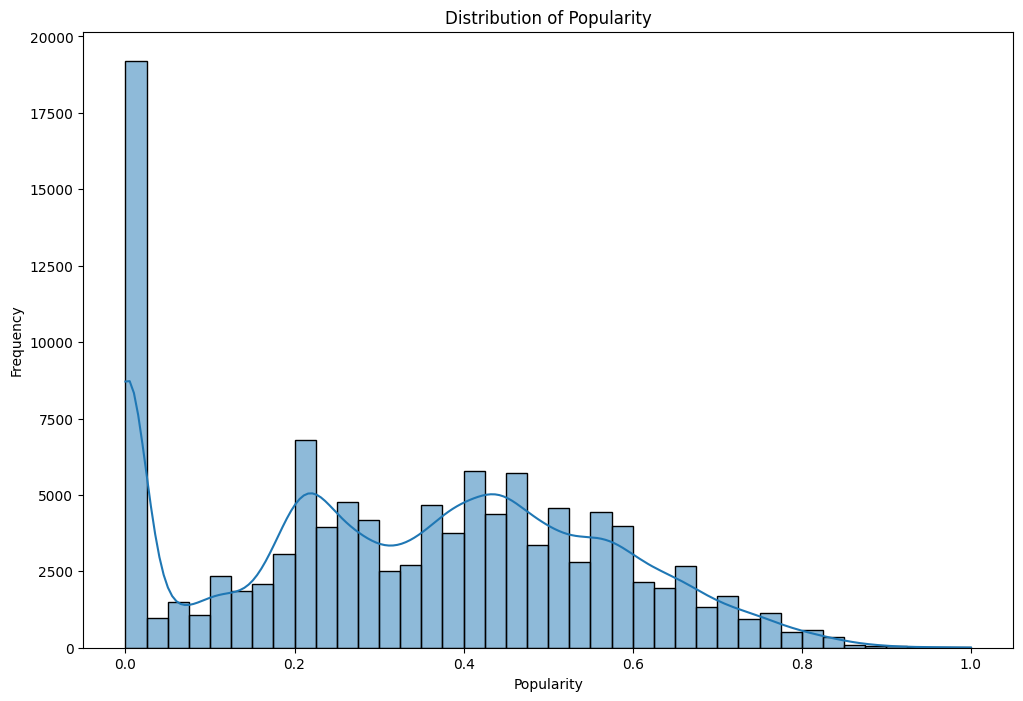

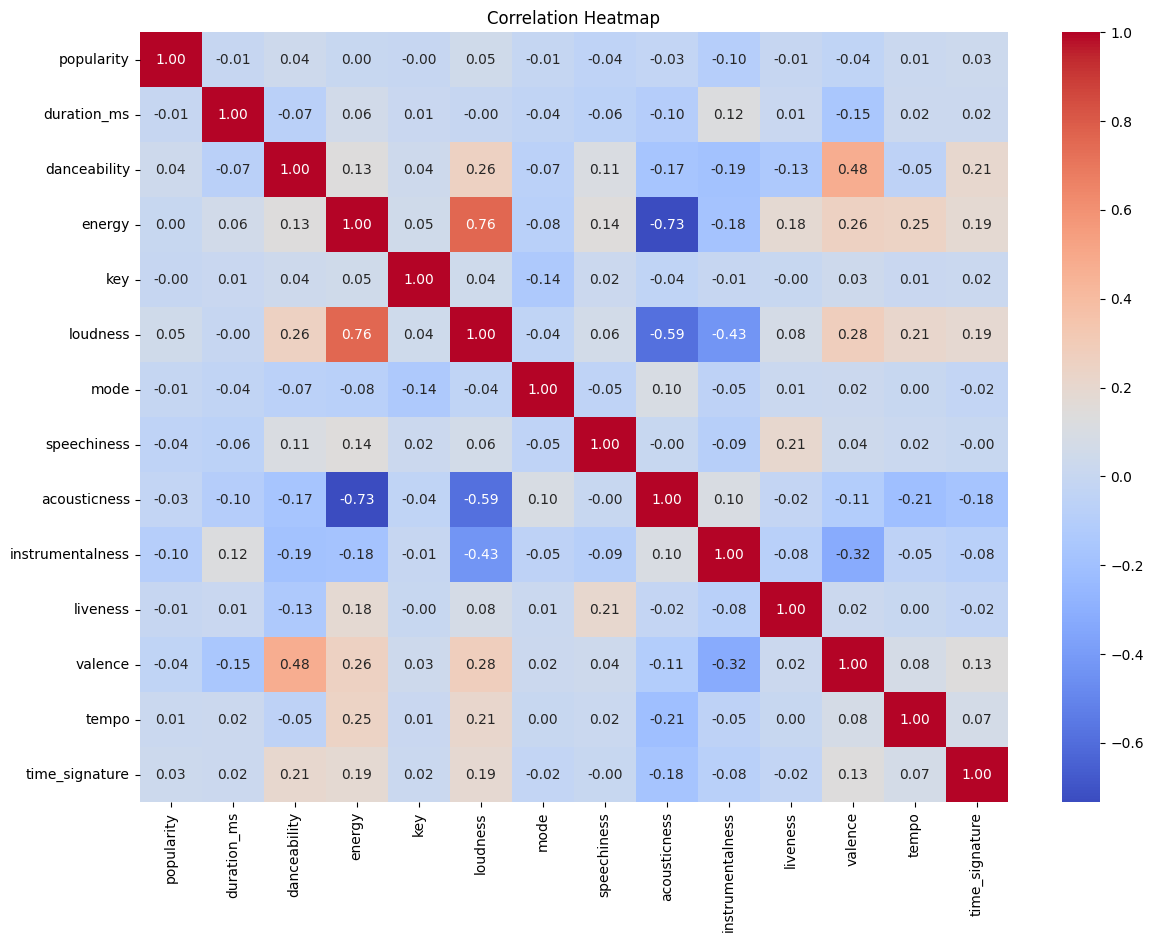

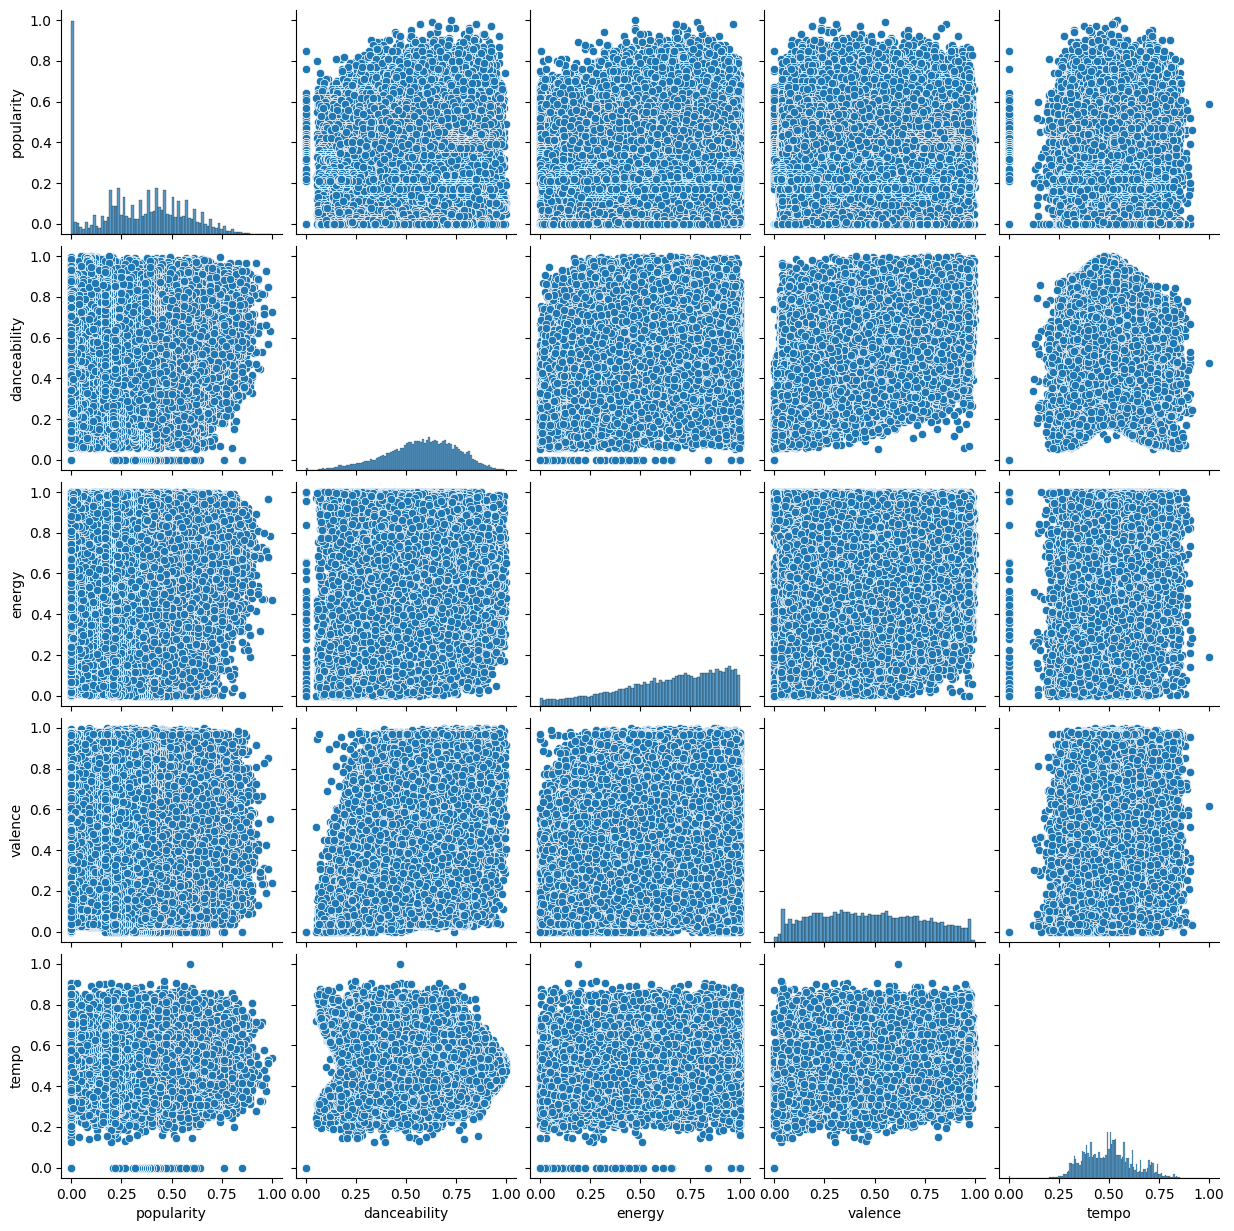

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.histplot(df['popularity'], bins=40, kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

# Carryout visualization correlation Heatmap

numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculation of the correlation matrix
plt.figure(figsize=(14, 10))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Pirplotting the selected features
sns.pairplot(df[['popularity', 'danceability', 'energy', 'valence', 'tempo']])
plt.show()